Javier Francisco Castilla Jiménez
* Ejercicio 6
* Práctica 1

In [18]:
import numpy as np 
import matplotlib.pyplot as plt
import NeuralFunctJC as nrn
plt.style.use('Solarize_Light2')

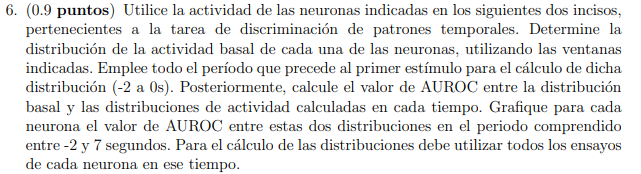

In [19]:
def dicneuronrate(dictneu,keyneuron,start=-1,stop=3,paso=0.01,ventana=0.2):
    """
    Esta función crea un diccionario donde las claves son los nombres de las neuronas y los valores
    son las tasas de disparo de cada neurona. 
    keyneurons:son las claves/llaves de cada neurona. Es una lista. o tupla.
    dictneu:es un diccionario dónde las llaves son keyneurons y los valores son los 
    datos crudos de todos los ensayos de una neurona
    salida es un diccionario."""
    Tns={clave:0 for clave in keyneuron}
    bsup,nven=nrn.bordesup(start,stop,paso,ventana,nv=True) 
    func=lambda ensayo : nrn.tasa(ensayo,nventanas=nven,paso=paso,ventana=ventana,start=start)# esta función calcula la tasa de disparo de un ensayo nventanas, paso=0.01,ventana=0.05,start=-2 
    for llave in keyneuron:
        fr=map(func,dictneu[llave]) # array con las tasas de disparo para cada ventana
        Tns[llave]=np.array(list(fr))
    return Tns

In [20]:
def getDistributions(tbasal,tasa,nbins=200):
    mi=np.floor(min((tbasal.min(),tasa.min())))# el mínimo de mínimos de las dos distribuciones
    mx=np.ceil(max((tbasal.max(),tasa.max())))# el máximo de máximos de las dos distribuciones
    bins=np.linspace(mi,mx,nbins) # genero un linspace entre el minimo de minimos y el maximo de maximos, y este linspace va a tener el número de bines que yo indique en nbins 
    nv=len(tasa[0])# cuantos datos tengo en el sample y que me va a servir para normalizar las frecuencias y convertirlas en probabilidades
    m,n=tbasal.shape
    distbasal=np.histogram(tbasal,bins=bins)[0]/(m*n) #probabilidades de los bines de la muestra 1
    dist_tasa=[]
    for v in range(nv):
        dist=np.histogram(tasa[:,v],bins=bins)[0]/(len(tasa[:,v])) #probabilidades de los bines de la muestra 2
        dist_tasa.append(dist)
    dist_tasa=np.vstack(dist_tasa)  
    return distbasal,dist_tasa

In [21]:
def getAUROC(dist1,dist2):
    """dadas dos distribuciones comparables es decir con la misma cantidad de bines en el mismo rango
    esta función calcula el AUROC
    los parametros de entrada:
    dist1=distribución 1
    dist2=distribución 2
    devuelve:
    el auroc que se genera con ambas distribuciones """
    cu1=np.cumsum(np.sort(dist1)) # suma acumulativa de la distribución 1 
    cu2=np.cumsum(np.sort(dist2)) # suma acumulativa de las distribución 2
    auroc=np.trapz(cu1,cu2) # calculo el area debajo de la curva , que está definida por la suma acumulativa de  1 y la suma acumulativa de 2
    # trapz es una función para la integración numérica trapezoidal
    auroc=0.5+(np.abs(auroc-0.5)) # el area que tanto se aleja de 0.5
    return auroc

In [22]:
def getAUROC_bv(tbasal,tasa,nv,bines=200):
    dist1,dist2=getDistributions(tbasal,tasa,nbins=bines)
    r=[]
    for v in range(nv):
        auroc=getAUROC(dist1,dist2[v])
        r.append(auroc)
    ROC=np.array(r)
    return ROC

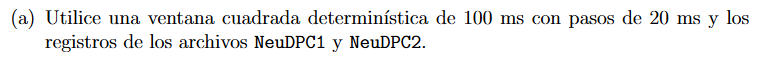

In [23]:
neuronasDPC=['1','2']
DPC1=nrn.importar('TiemposNeuDPC1.csv')
DPC2=nrn.importar('TiemposNeuDPC2.csv')
NeuronsDPC={'1':DPC1,'2':DPC2}
TnsDPCbase=dicneuronrate(NeuronsDPC,neuronasDPC,start=-2,stop=0,paso=0.02,ventana=0.1)
TnsDPC=dicneuronrate(NeuronsDPC,neuronasDPC,start=-2,stop=7,paso=0.02,ventana=0.1)

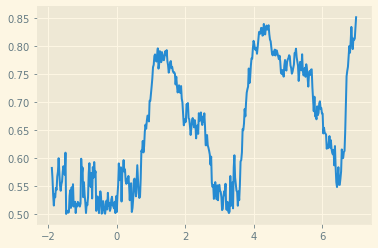

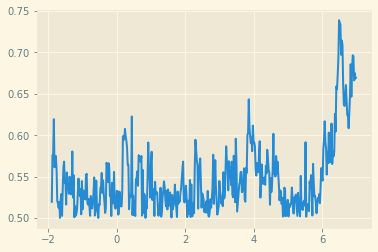

In [24]:
bsup1,nven=nrn.bordesup(start=-2,stop=7,paso=0.02,ventana=0.1,nv=True)
ROCdpc=dict()
for neuron in neuronasDPC:
    R=getAUROC_bv(TnsDPCbase[neuron],TnsDPC[neuron],nven)
    ROCdpc.update({neuron:R})
    plt.plot(bsup1,R)
    plt.show()

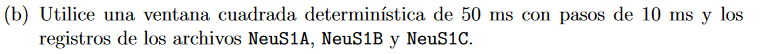

In [25]:
neuronasS1=['A','B','C']
TS1A=nrn.importar('TiemposNeuS1A.csv')
TS1B=nrn.importar('TiemposNeuS1B.csv')
TS1C=nrn.importar('TiemposNeuS1C.csv')
NeuronsS1={'A':TS1A,'B':TS1B,'C':TS1C} # lista de listas con los np.ndarrays de lod tiempos de ocurrencia de las espigas
TnsS1base=dicneuronrate(NeuronsS1,neuronasS1,start=-2,stop=0,paso=0.01,ventana=0.05)
TnsS1=dicneuronrate(NeuronsS1,neuronasS1,start=-2,stop=7,paso=0.01,ventana=0.05)

In [26]:
len(TnsS1base['A'][0])

196

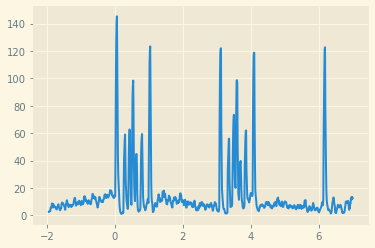

In [27]:
bsup2,nven2=nrn.bordesup(start=-2,stop=7,paso=0.01,ventana=0.05,nv=True) 
plt.plot(bsup2,np.mean(TnsS1['A'],axis=0))

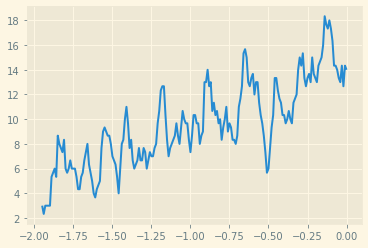

In [28]:
bsup2,nven=nrn.bordesup(start=-2,stop=0,paso=0.01,ventana=0.05,nv=True)
plt.plot(bsup2,np.mean(TnsS1base['A'],axis=0))

[0.58888251 0.59818452 0.58888251 0.59410289 0.59410289 0.59410289
 0.56410998 0.55684878 0.54754677 0.55480796 0.51742418 0.5186926
 0.52073342 0.53003543 0.53271896 0.56335247 0.56602112 0.55276715
 0.53824476 0.53506519 0.54550595 0.55072633 0.56933036 0.5795805
 0.56505811 0.55371528 0.54754677 0.53098356 0.53321499 0.51519274
 0.54550595 0.55276715 0.56728954 0.57753968 0.5795805  0.57027849
 0.57137117 0.56615079 0.53175595 0.51315193 0.51699334 0.50907029
 0.51111111 0.50939059 0.52391298 0.52894274 0.53620394 0.54645408
 0.55480796 0.58385275 0.56206916 0.51237954 0.51143141 0.51334113
 0.5330839  0.53754677 0.51029266 0.50532242 0.52576318 0.52984481
 0.52258362 0.52576318 0.5328947  0.54945791 0.54883007 0.5328947
 0.52894274 0.54754677 0.54883007 0.54251701 0.54550595 0.54346514
 0.53620394 0.52894274 0.50717262 0.51048186 0.53244118 0.53244118
 0.5243424  0.5018091  0.52041312 0.53620394 0.51646117 0.50997236
 0.51723356 0.50997236 0.51519274 0.51646117 0.52576318 0.5038499

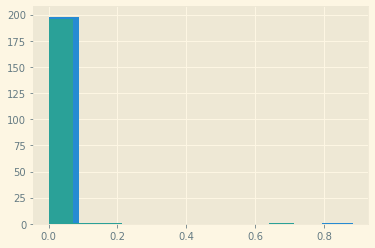

In [29]:
basal,tasas1=getDistributions(TnsS1base['A'],TnsS1['A'])
plt.hist(tasas1[0])
plt.hist(basal)
r=[]
for v in range(nven2):
    auroc=getAUROC(basal,tasas1[v])
    r.append(auroc)
ROC=np.array(r)
print(ROC)

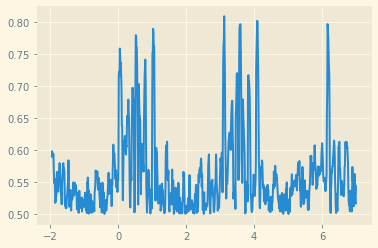

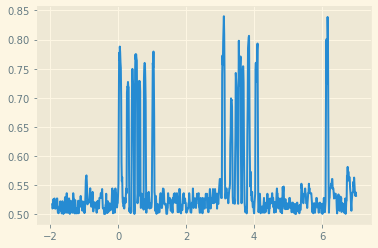

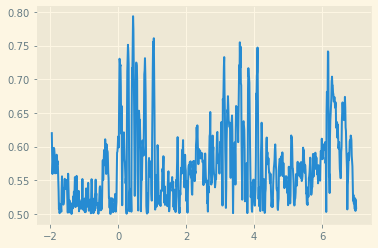

In [30]:
bsup2,nven=nrn.bordesup(start=-2,stop=7,paso=0.01,ventana=0.05,nv=True)
ROCs1=dict()
for neuron in neuronasS1:
    R=getAUROC_bv(TnsS1base[neuron],TnsS1[neuron],nven)
    ROCs1.update({neuron:R})
    plt.plot(bsup2,R)
    plt.show()
   

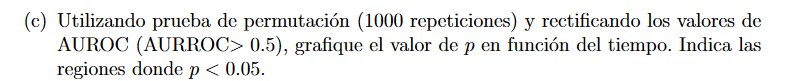

In [31]:
def permutacion(data,nperm=1000):
    """
    esta función permuta los datos de las tasa de disparo de una neurona y guarda 
    en una lista las permutaciones donde cada elemento de las lista es una permutación 
    de los datos
    """
    forma=data.shape
    ndat=forma[0]*forma[1]
    aplana=data.flatten()
    permutaciones=[aplana[np.random.permutation(ndat)].reshape(forma) for i in range(nperm)]
    return permutaciones

In [32]:
def AUROC_permutado(datab,datat,nv,nperm=1000):
    pr_AR=[]
    iv=len(datab[0])
    tasaperm=permutacion(datat,nperm)
    for b in range(nperm):
        basalperm=tasaperm[b][:,:iv+1]
        pr_AR.append(getAUROC_bv(basalperm,tasaperm[b],nv))
    pr_AR=np.vstack(pr_AR)
    return pr_AR

In [33]:
bsup1,nven1=nrn.bordesup(start=-2,stop=7,paso=0.02,ventana=0.1,nv=True)
pes=dict()
for neuron in neuronasDPC:
    R_real=ROCdpc[neuron]
    R_permutada=AUROC_permutado(TnsDPCbase[neuron],TnsDPC[neuron],nven1)
    p=np.sum(R_permutada>R_real,axis=0)/len(R_permutada)
    pes.update({neuron:p})

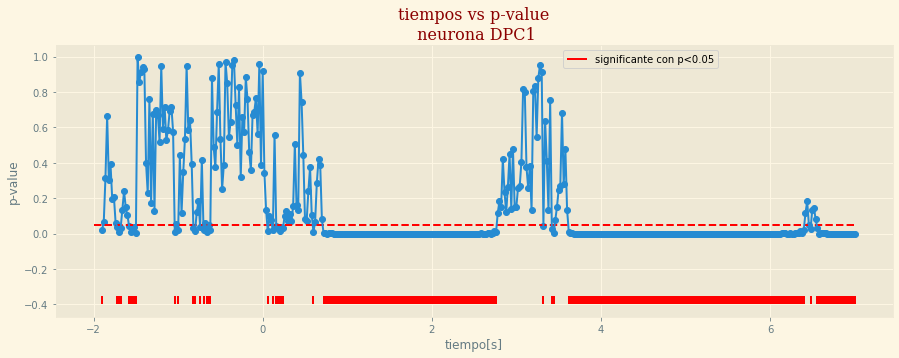

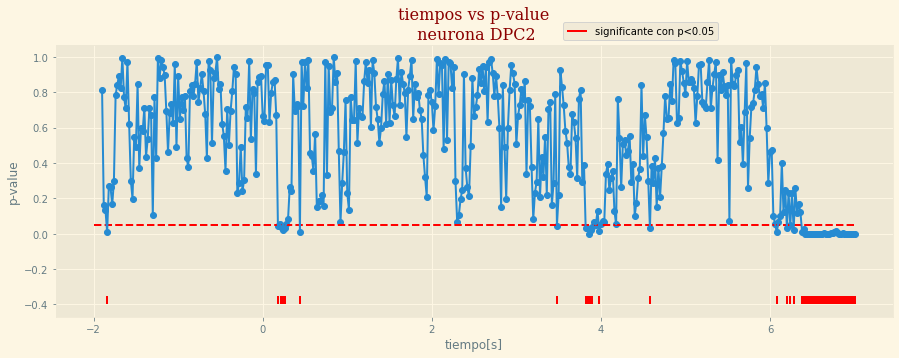

In [38]:
for llave in neuronasDPC:
    Tsignificantes=bsup1[np.where(pes[llave]<0.05)]
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    fig,(ax1)=plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(15,5))
    ax1.scatter(bsup1,pes[llave])
    ax1.plot(bsup1,pes[llave])
    ax1.hlines(0.05,-2,7,linestyles ="dashed", colors ="red")
    ax1.vlines(Tsignificantes,-0.35,-0.40,linestyles ="solid", colors ="red",label='significante con p<0.05')
    ax1.set_ylabel('p-value')
    ax1.set_xlabel('tiempo[s]')
    ax1.set_title('tiempos vs p-value\n neurona DPC'+llave, fontdict_title) 
    ax1.legend(loc='best', bbox_to_anchor=(0.6, 1))

In [39]:
bsup2,nven2=nrn.bordesup(start=-2,stop=7,paso=0.01,ventana=0.05,nv=True)
pesS1=dict()
for neuron in neuronasS1:
    R_real=ROCs1[neuron]
    R_permutada=AUROC_permutado(TnsS1base[neuron],TnsS1[neuron],nven2)
    p=np.sum(R_permutada>R_real,axis=0)/len(R_permutada)
    pesS1.update({neuron:p})

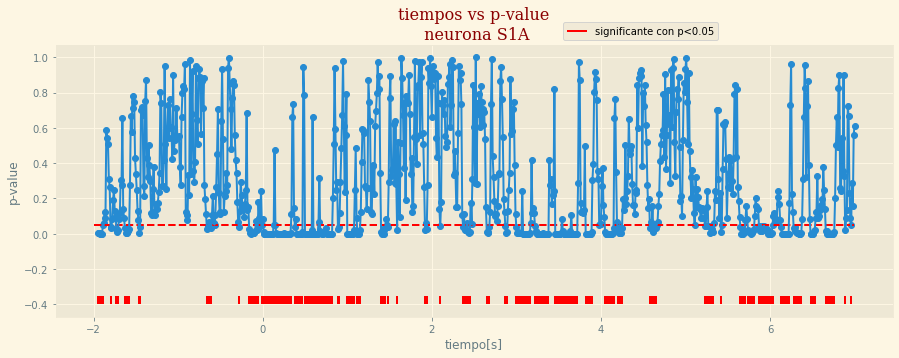

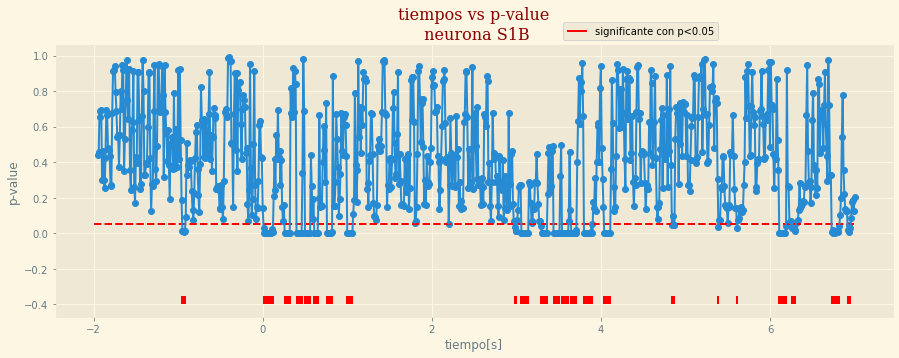

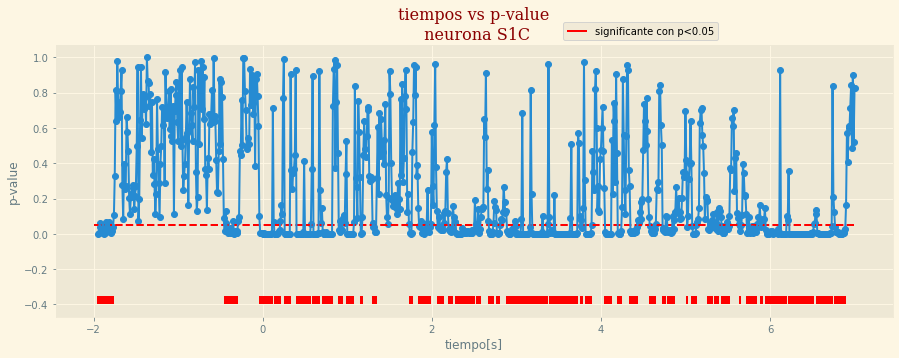

In [40]:
for llave in neuronasS1:
    Tsignificantes=bsup2[np.where(pesS1[llave]<0.05)]
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    fig,(ax1)=plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(15,5))
    ax1.scatter(bsup2,pesS1[llave])
    ax1.plot(bsup2,pesS1[llave])
    ax1.hlines(0.05,-2,7,linestyles ="dashed", colors ="red")
    ax1.vlines(Tsignificantes,-0.35,-0.40,linestyles ="solid", colors ="red",label='significante con p<0.05')
    ax1.set_ylabel('p-value')
    ax1.set_xlabel('tiempo[s]')
    ax1.set_title('tiempos vs p-value\n neurona S1'+llave, fontdict_title) 
    ax1.legend(loc='best', bbox_to_anchor=(0.6, 1))

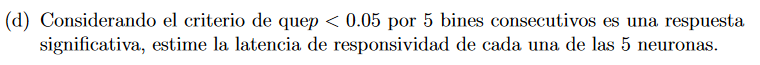

In [41]:
def latrep(pes,tiempos,p=0.05):
    comp=pes<p
    for i in range(len(pes)):
        if comp[i]==True and comp[i]==comp[i+1]==comp[i+2]==comp[i+3]==comp[i+4]:
            break
    return tiempos[i]
 

con estas ventana y paso la latencia de responsividad: -1.58
con estas ventana y paso la latencia de responsividad: 3.82


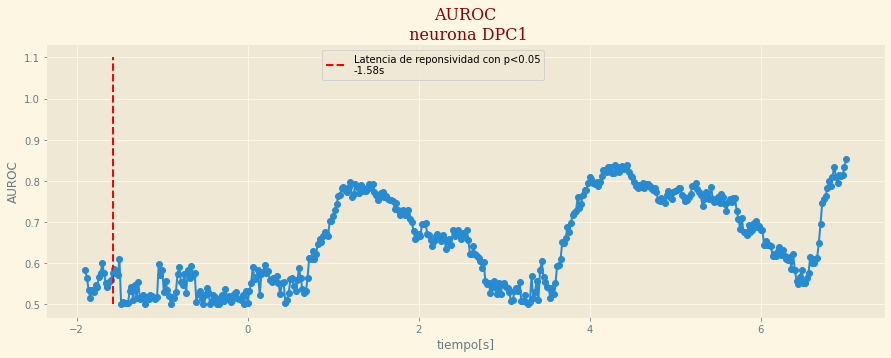

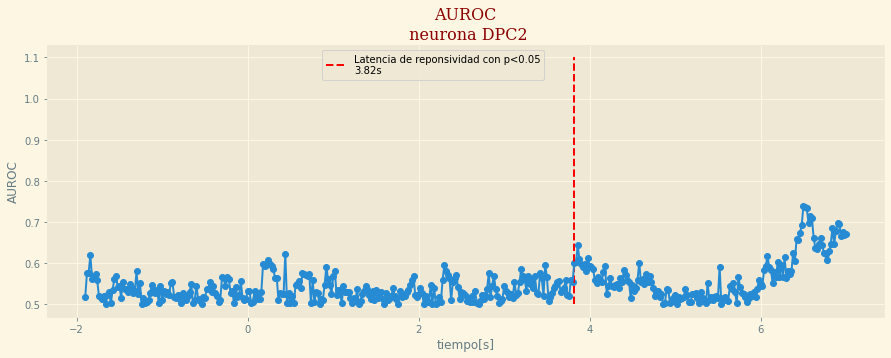

In [42]:
bsup1,nven1=nrn.bordesup(start=-2,stop=7,paso=0.02,ventana=0.1,nv=True)
for llave in neuronasDPC:
    r=latrep(pes[llave],bsup1)    
    print('con estas ventana y paso la latencia de responsividad:',r) 
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    fig,(ax1)=plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(15,5))
    ax1.scatter(bsup1,ROCdpc[llave])
    ax1.plot(bsup1,ROCdpc[llave])
    ax1.vlines(r,0.50,1.1,linestyles ="dashed", colors ="red",label='Latencia de reponsividad con p<0.05\n'+str(r)+'s')
    ax1.set_ylabel('AUROC')
    ax1.set_xlabel('tiempo[s]')
    ax1.set_title('AUROC\n neurona DPC'+llave, fontdict_title) 
    ax1.legend(loc='best', bbox_to_anchor=(0.6, 1))

con estas ventana y paso la latencia de responsividad: -1.95
con estas ventana y paso la latencia de responsividad: 0.01
con estas ventana y paso la latencia de responsividad: -1.92


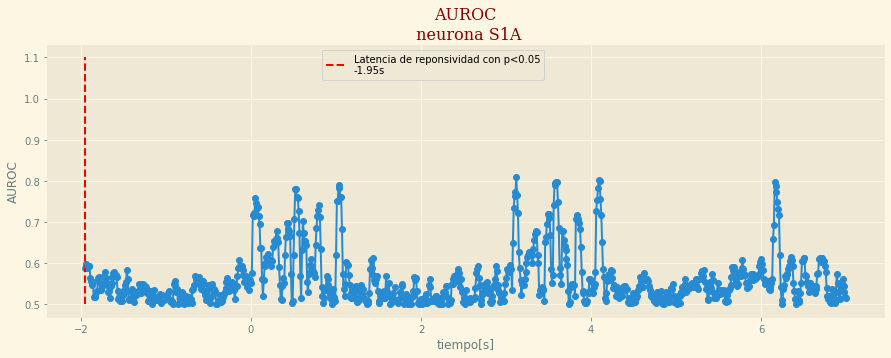

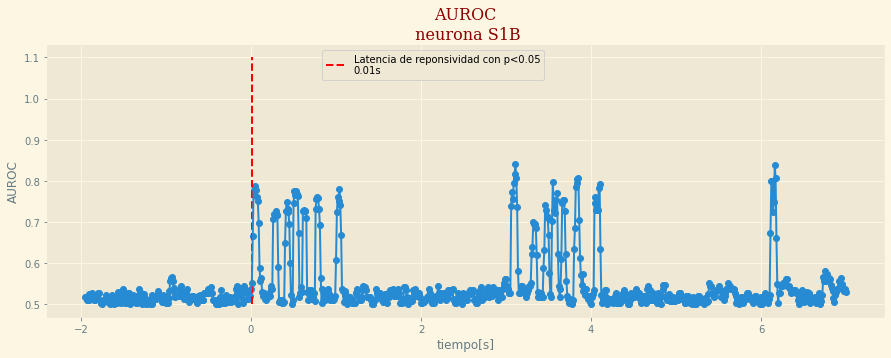

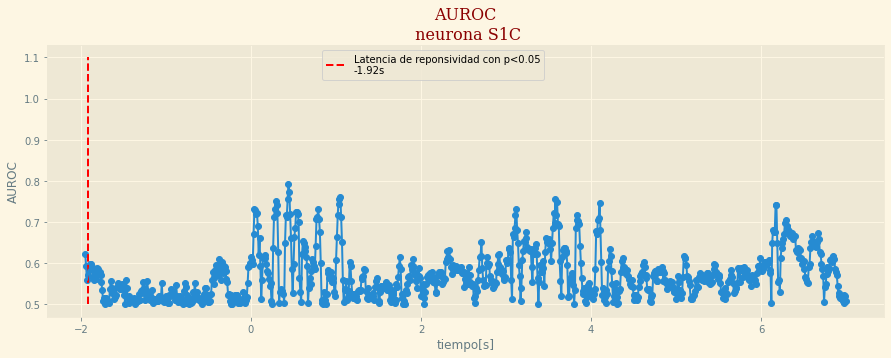

In [43]:
bsup2,nven2=nrn.bordesup(start=-2,stop=7,paso=0.01,ventana=0.05,nv=True)
for llave in neuronasS1:
    r=latrep(pesS1[llave],bsup2)
    print('con estas ventana y paso la latencia de responsividad:',r) 
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    fig,(ax1)=plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(15,5))
    ax1.scatter(bsup2,ROCs1[llave])
    ax1.plot(bsup2,ROCs1[llave])
    ax1.vlines(r,0.50,1.1,linestyles ="dashed", colors ="red",label='Latencia de reponsividad con p<0.05\n'+str(r)+'s')
    ax1.set_ylabel('AUROC')
    ax1.set_xlabel('tiempo[s]')
    ax1.set_title('AUROC\n neurona S1'+llave, fontdict_title) 
    ax1.legend(loc='best', bbox_to_anchor=(0.6, 1))